In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pydub import AudioSegment
from scipy.io import wavfile
from tempfile import mktemp
from pydub import AudioSegment
import IPython
import librosa
import IPython.display as ipd
import librosa.display
plt.figure(figsize=(15,4))
from sklearn.model_selection import RepeatedStratifiedKFold

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_1900\3992089048.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


<Figure size 1500x400 with 0 Axes>

In [2]:
df=pd.read_csv("D:/ashi/cv-valid-train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195776 entries, 0 to 195775
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   filename    195776 non-null  object 
 1   text        195776 non-null  object 
 2   up_votes    195776 non-null  int64  
 3   down_votes  195776 non-null  int64  
 4   age         73768 non-null   object 
 5   gender      74059 non-null   object 
 6   accent      64711 non-null   object 
 7   duration    0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 11.9+ MB


In [4]:
df.head()

,filename,text,up_votes,down_votes,age,gender,accent,duration
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,1,0,NaN,NaN,NaN,NaN
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,1,0,NaN,NaN,NaN,NaN
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,1,0,NaN,NaN,NaN,NaN
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,1,0,NaN,NaN,NaN,NaN
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,3,2,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

filename           0
text               0
up_votes           0
down_votes         0
age           122008
gender        121717
accent        131065
duration      195776
dtype: int64

In [6]:
df.drop('duration',axis=1,inplace=True)
df.shape

(195776, 7)

In [7]:
data=df[(df.age.notna())&(df.gender.notna())]
data.shape

(73466, 7)

In [8]:
age_count=data.groupby(['age','gender']).agg({'filename':'count'}).reset_index()
fig = px.bar(age_count, x="age", y="filename", color="gender", title="Count files by age",text_auto=True).update_xaxes(categoryorder="total descending")
fig.show()

In [9]:
gender_count=data.groupby('gender').agg({'filename':'count'}).reset_index()
fig = px.bar(gender_count, x="gender", y="filename",  title="Count files by gender",text_auto=True).update_xaxes(categoryorder="total descending")
fig.show()

In [10]:
accent_count=data.groupby(['accent','gender']).agg({'filename':'count'}).reset_index()
fig = px.bar(accent_count, x="accent", y="filename", color='gender', title="Count files by accent",text_auto=True).update_xaxes(categoryorder="total descending")
fig.show()

In [11]:
accent_count=data.groupby(['accent','age']).agg({'filename':'count'}).reset_index()
fig = px.bar(accent_count, x="accent", y="filename", color='age', title="Count files by accent",text_auto=True).update_xaxes(categoryorder="total descending")
fig.show()

In [12]:
path =['D:/ashi/cv-valid-train'+path for path in data.filename]
sr = 22050 # sample rate
IPython.display.Audio(path[1], rate=sr)

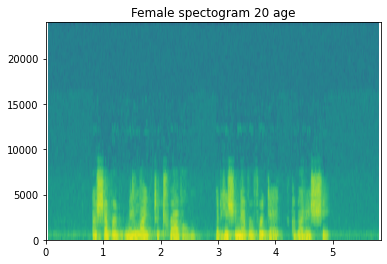

In [13]:
mp3_audio = AudioSegment.from_file(path[0], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Female spectogram 20 age')
plt.show()

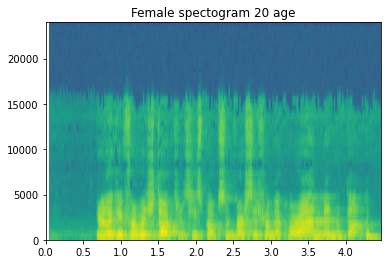

In [14]:
mp3_audio = AudioSegment.from_file(path[25], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Female spectogram 20 age')
plt.show()

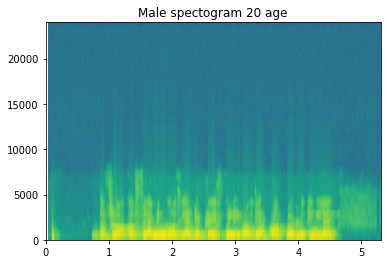

In [15]:
mp3_audio = AudioSegment.from_file(path[26], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Male spectogram 20 age')
plt.show()

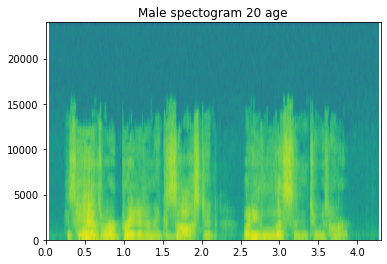

In [16]:
mp3_audio = AudioSegment.from_file(path[42], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Male spectogram 20 age')
plt.show()

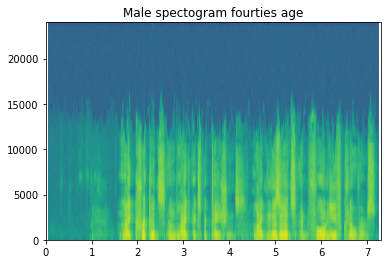

In [17]:
mp3_audio = AudioSegment.from_file(path[48], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Male spectogram fourties age')
plt.show()

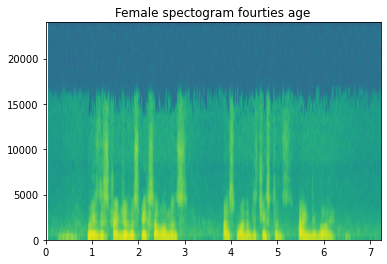

In [18]:
mp3_audio = AudioSegment.from_file(path[33], format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, ds = wavfile.read(wname)  # read wav file
plt.specgram(ds, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.title('Female spectogram fourties age')
plt.show()

### MicroFunctions

In [19]:
y,sr = librosa.load(path[0], sr=22050, mono=True, offset=0.0, duration=50, res_type='kaiser_best')

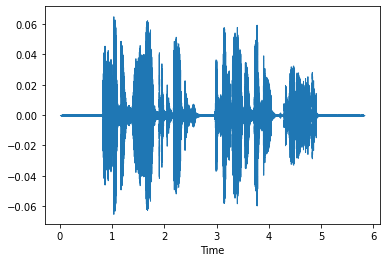

In [20]:
#amplitude envelope of a waveform.
librosa.display.waveshow(y,sr=sr)

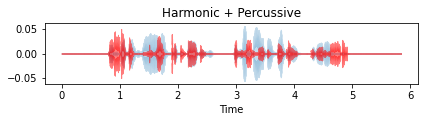

In [21]:
y, sr = librosa.load(path[0], duration=10)
y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(3, 1, 3)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.25)
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')
plt.tight_layout()
plt.show()

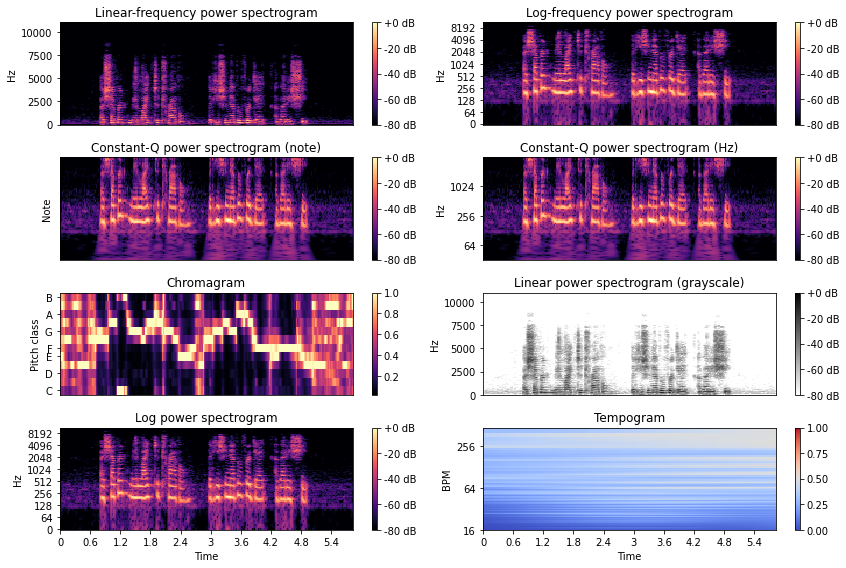

In [22]:
y, sr = librosa.load(path[0], duration=10)
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.subplot(4, 2, 2)
librosa.display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')
CQT = librosa.amplitude_to_db(np.abs(librosa.cqt(y, sr=sr)), ref=np.max)
plt.subplot(4, 2, 3)
librosa.display.specshow(CQT, y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (note)')
plt.subplot(4, 2, 4)
librosa.display.specshow(CQT, y_axis='cqt_hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q power spectrogram (Hz)')
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.subplot(4, 2, 5)
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.subplot(4, 2, 6)
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')
plt.subplot(4, 2, 7)
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')
plt.subplot(4, 2, 8)
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')
plt.tight_layout()
plt.show()

In [23]:
cleanup_nums = {"teens":0.0,"twenties":1.0,"thirties":2.0,"fourties":3.0,"fifties":4.0,"sixties":5.0,"seventies":6.0,"twenties":7.0,"eighties":8.0}
data.age = data.age.map(cleanup_nums)
data = data[:1000]
data.head()

,filename,text,up_votes,down_votes,age,gender,accent
5,cv-valid-train/sample-000005.mp3,a shepherd may like to travel but he should ne...,1,0,7.0,female,us
8,cv-valid-train/sample-000008.mp3,put jackie right on the staff,3,0,6.0,male,us
13,cv-valid-train/sample-000013.mp3,but he had found a guide and didn't want to mi...,1,0,2.0,female,us
14,cv-valid-train/sample-000014.mp3,as they began to decorate the hallway a silhou...,1,0,5.0,male,england
19,cv-valid-train/sample-000019.mp3,then they got ahold of some dough and went goofy,1,0,4.0,male,australia


In [24]:
ds_path = "/kaggle/input/common-voice/cv-valid-train/"

#this function is used to extract audio frequency features
def feature_extraction(filename, sampling_rate=48000):
    path = "{}{}".format(ds_path, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
    
    gender = data[data['filename'] == filename].gender.values[0]
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    features.append(gender)
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = feature_extraction(data.iloc[0]['filename'])
print("features: ", features)

features:  ['female', 2679.939301596305, 3347.669229746562, 5745.486745886655, -625.21814, 111.32094, 6.326995, 34.757614, 31.619902, -4.714648, -0.48603317, -4.934027, -12.714735, -2.0551496, -3.741118, -10.702963, -11.202636, -12.003523, -8.489579, -5.463276, -4.9542174, -3.7152, -6.330531, -6.338476]


In [25]:
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 1000
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = feature_extraction(row['filename'])
        features.append(row['age'])
        new_rows.append(features)

    return pd.DataFrame(new_rows, columns=["label", "spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "age"])

df_features = create_df_features(data)
df_features.head()

999/999

,label,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age
0,female,2679.939302,3347.669230,5745.486746,-625.218140,111.320938,6.326995,34.757614,31.619902,-4.714648,...,-10.702963,-11.202636,-12.003523,-8.489579,-5.463276,-4.954217,-3.715200,-6.330531,-6.338476,7.0
1,male,2859.452074,2576.680218,4912.384969,-469.920441,126.275574,-16.554510,3.557193,2.179635,13.759791,...,-10.984014,1.137728,6.090149,-1.733229,-1.226659,-6.425835,-7.262796,-4.797015,-3.135337,6.0
2,female,1976.264151,1830.634203,3344.655227,-418.205048,147.668320,-49.972744,-2.285531,37.187012,-8.904264,...,-13.845865,-9.927492,-7.871622,-5.473862,-2.295656,-6.554993,-5.206916,-0.407431,-3.882372,2.0
3,male,2333.763596,2533.282996,4398.824257,-464.911224,118.436134,19.749298,27.143938,26.439018,2.309576,...,-5.458494,-2.907650,-4.495940,-2.715732,-0.079106,-5.292980,-5.866175,0.601412,-3.376775,5.0
4,male,2351.920593,2974.752406,4743.105301,-343.832214,157.152222,7.661032,41.899761,-15.152517,28.925171,...,0.101558,6.319917,-1.603130,3.837097,-2.643987,2.324086,-1.383032,3.790379,-3.534915,4.0


In [26]:
df_features.shape

(357, 25)

In [27]:
df_features.iloc[:,1:]

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age
0,2679.939302,3347.669230,5745.486746,-625.218140,111.320938,6.326995,34.757614,31.619902,-4.714648,-0.486033,...,-10.702963,-11.202636,-12.003523,-8.489579,-5.463276,-4.954217,-3.715200,-6.330531,-6.338476,7.0
1,2859.452074,2576.680218,4912.384969,-469.920441,126.275574,-16.554510,3.557193,2.179635,13.759791,-1.313110,...,-10.984014,1.137728,6.090149,-1.733229,-1.226659,-6.425835,-7.262796,-4.797015,-3.135337,6.0
2,1976.264151,1830.634203,3344.655227,-418.205048,147.668320,-49.972744,-2.285531,37.187012,-8.904264,-14.226655,...,-13.845865,-9.927492,-7.871622,-5.473862,-2.295656,-6.554993,-5.206916,-0.407431,-3.882372,2.0
3,2333.763596,2533.282996,4398.824257,-464.911224,118.436134,19.749298,27.143938,26.439018,2.309576,-9.354494,...,-5.458494,-2.907650,-4.495940,-2.715732,-0.079106,-5.292980,-5.866175,0.601412,-3.376775,5.0
4,2351.920593,2974.752406,4743.105301,-343.832214,157.152222,7.661032,41.899761,-15.152517,28.925171,0.091897,...,0.101558,6.319917,-1.603130,3.837097,-2.643987,2.324086,-1.383032,3.790379,-3.534915,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,3012.058900,3194.627564,5612.033279,-352.642853,111.335548,10.969419,43.018772,-5.846693,33.564144,5.518002,...,-6.128564,-2.963297,-12.508800,-4.819113,4.898642,-0.968750,-3.084738,4.960913,-6.900790,7.0
353,2439.958281,3262.148584,5234.578982,-570.815430,91.826973,26.241430,24.656227,13.769625,9.350377,15.685758,...,-0.539860,3.229256,0.336637,-0.565330,-0.676929,-5.600832,-3.810547,-0.091337,-1.910590,3.0
354,3966.973465,3147.587895,7176.591981,-497.939453,90.754265,-26.420935,26.556751,-2.170398,-4.835808,-11.170390,...,-1.419974,-13.770571,-6.579512,-2.153989,-7.797197,-1.836342,-1.201977,-7.668564,-3.060488,3.0
355,2375.947105,2912.347221,5030.750363,-355.934692,149.843323,14.244518,-13.875988,-9.767066,5.608076,-2.802120,...,1.822457,3.203298,-10.520350,-4.717821,-0.872801,3.126566,1.700345,-1.749628,-10.463286,7.0


In [28]:
from sklearn.preprocessing import StandardScaler
data = df_features.iloc[:,1:]
scaler = StandardScaler()
df_features.iloc[:,1:]=scaler.fit_transform(data)


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_features['label']=le.fit_transform(df_features.label)


In [30]:
df_features

,label,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,age
0,0,-0.201397,0.865263,0.240924,-2.160698,-0.349355,0.570005,0.784684,1.513342,-0.809826,...,-1.175025,-1.709385,-1.229347,-1.116364,-0.692866,-0.306850,-0.463812,-1.091243,-0.666044,1.266516
1,1,0.005900,-0.359852,-0.267778,-0.386013,0.231723,-0.596696,-1.280539,-0.555199,0.484603,...,-1.227178,0.627202,2.330789,0.250073,0.305574,-0.664638,-1.391971,-0.747703,0.309485,0.831341
2,0,-1.013986,-1.545332,-1.225054,0.204971,1.062960,-2.300653,-1.667282,1.904500,-1.103375,...,-1.758229,-1.467943,-0.416348,-0.506451,0.053644,-0.696039,-0.854091,0.235658,0.081972,-0.909356
3,1,-0.601154,-0.428811,-0.581365,-0.328770,-0.072886,1.254393,0.280718,1.149321,-0.317667,...,-0.201849,-0.138771,0.247855,0.051367,0.576016,-0.389212,-1.026573,0.461660,0.235954,0.396167
4,1,-0.580186,0.272692,-0.371143,1.054877,1.431467,0.638026,1.257438,-1.772996,1.547180,...,0.829887,1.608423,0.817049,1.376643,-0.028447,1.462692,0.146353,1.176057,0.187791,-0.039007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,1,0.182128,0.622077,0.159436,0.954192,-0.348787,0.806717,1.331508,-1.119148,1.872214,...,-0.326189,-0.149307,-1.328766,-0.374031,1.749117,0.662119,-0.298865,1.438282,-0.837300,1.266516
353,1,-0.478522,0.729369,-0.071043,-1.539004,-1.106813,1.585419,0.116051,0.259140,0.175653,...,0.710864,1.023222,1.198720,0.486275,0.435128,-0.464058,-0.488758,0.306470,0.682486,-0.474182
354,0,1.284843,0.547330,1.114775,-0.706204,-1.148494,-1.099774,0.241851,-0.860843,-0.818315,...,0.547548,-2.195611,-0.162111,0.164976,-1.242899,0.451185,0.193723,-1.390991,0.332280,-0.474182
355,1,-0.552441,0.173529,-0.195503,0.916574,1.147472,0.973710,-2.434479,-1.394602,-0.086554,...,1.149221,1.018307,-0.937516,-0.353546,0.388967,1.657795,0.953058,-0.065023,-1.922272,1.266516


In [31]:
x=df_features.iloc[:,1:]
y=df_features['label']

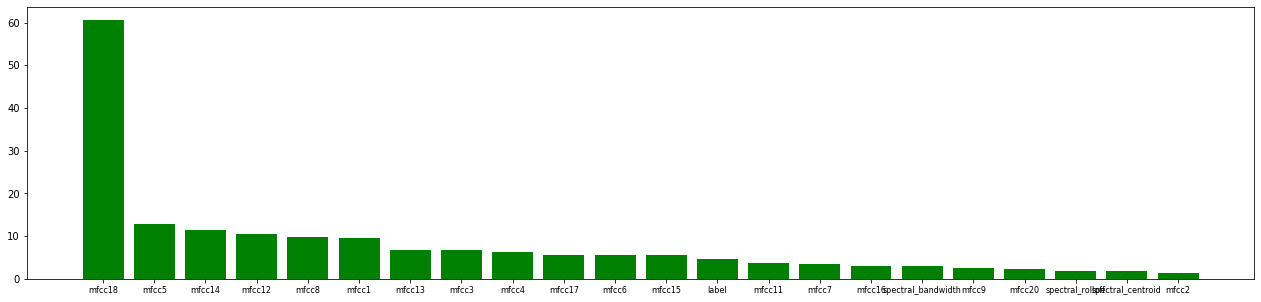

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

n_features = 22

f_selector = SelectKBest(f_classif, k=n_features).fit(x, y)
X_new = f_selector.transform(x)
scores = f_selector.scores_

indices = np.argsort(scores)[::-1]

features = []
for i in range(n_features):
    features.append(df_features.columns[indices[i]])
    
plt.figure(figsize=(22, 5))
plt.bar(features, scores[indices[range(n_features)]], color='g')
plt.xticks(fontsize=8)
plt.show()

In [33]:
def target_coeff(dataframe,target):
    data = dataframe.corr()[target].sort_values(ascending=False)
    indices = data.index
    labels = []
    corr = []
    for i in range(1, len(indices)):
        labels.append(indices[i])
        corr.append(data[i])
    plt.figure(figsize=(10,8),dpi=100)    
    sns.barplot(x=corr, y=labels, palette="RdBu")
    plt.title('Correlation Coefficient for : {} column'.format(target.upper()))
    plt.show()

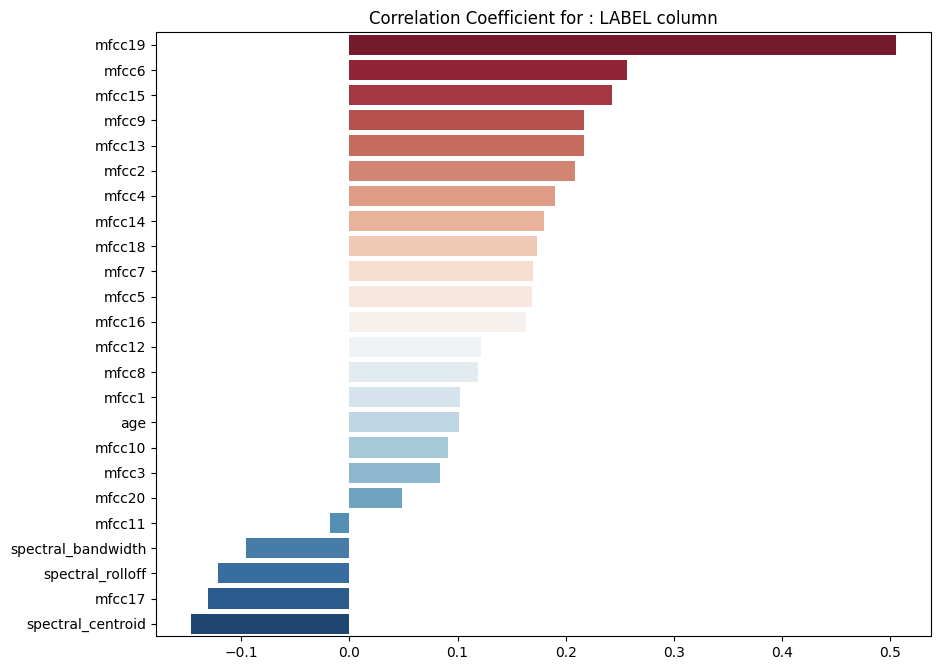

In [34]:
target_coeff(df_features,'label')

In [35]:
fig = px.scatter(df_features, x="mfcc19", y="mfcc6",  color="label",
                 hover_data=['label'])
fig.show()

In [36]:
fig = px.scatter(df_features, x="mfcc19", y="mfcc9",  color="label",
                 hover_data=['label'])
fig.show()

In [37]:
fig = px.scatter(df_features, x="mfcc19", y="mfcc6",  color="label",
                 hover_data=['label'])
fig.show()

In [38]:
fig = px.scatter(df_features, x="spectral_centroid", y="spectral_rolloff",  color="label",
                 hover_data=['label'])
fig.show()

In [39]:
fig = px.scatter(df_features, x="spectral_centroid", y="spectral_bandwidth",  color="label",
                 hover_data=['label'])
fig.show()

In [40]:
fig = px.scatter(df_features, x="spectral_bandwidth", y="spectral_rolloff",  color="label",
                 hover_data=['label'])
fig.show()

In [41]:
def distribution(x,title):
    plt.figure(figsize=(15,6))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

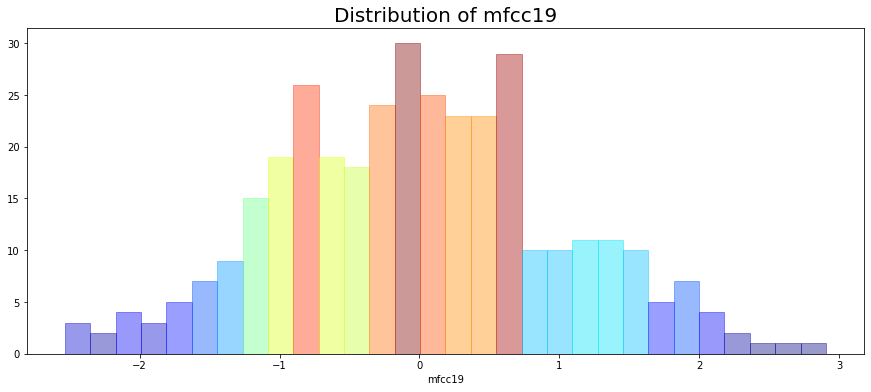

In [42]:
distribution(df_features.mfcc19,'Distribution of mfcc19')

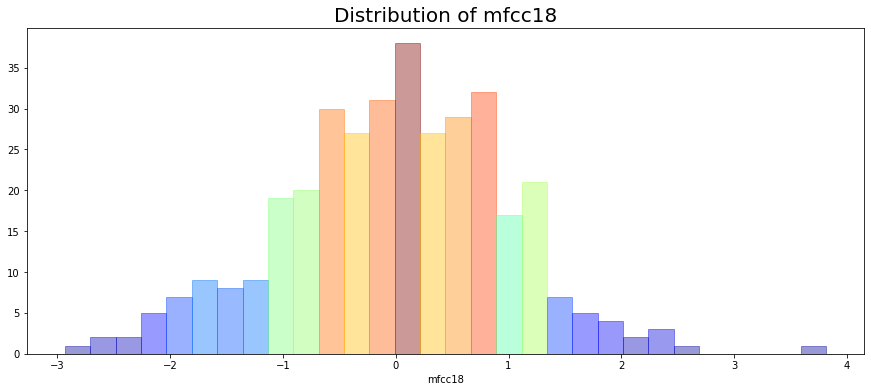

In [43]:
distribution(df_features.mfcc18,'Distribution of mfcc18')

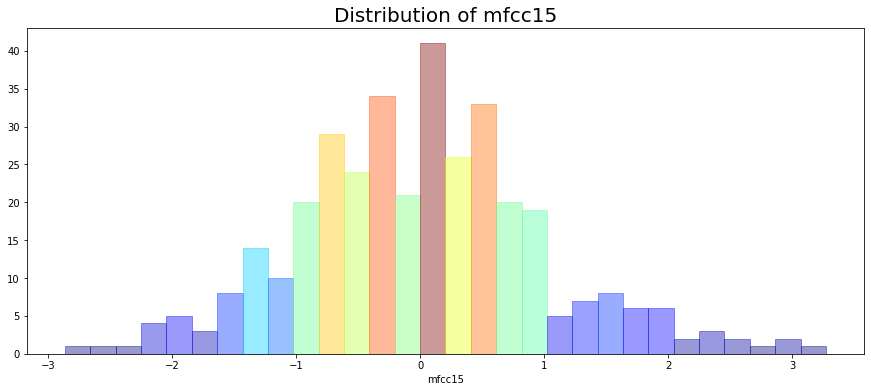

In [44]:
distribution(df_features.mfcc15,'Distribution of mfcc15')

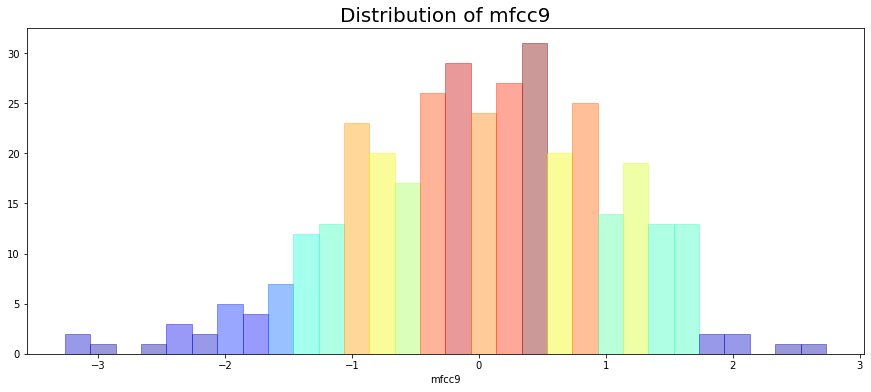

In [45]:
distribution(df_features.mfcc9,'Distribution of mfcc9')

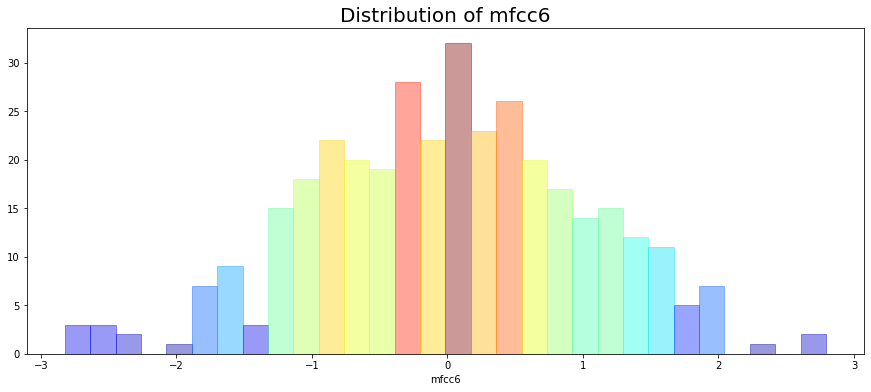

In [46]:
distribution(df_features.mfcc6,'Distribution of mfcc6')

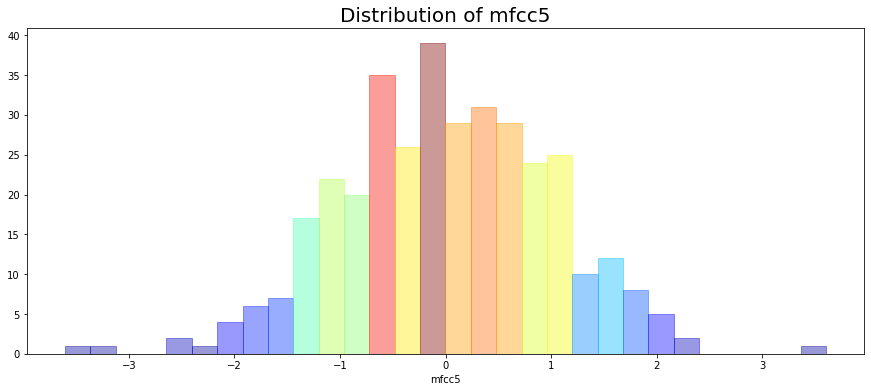

In [47]:
distribution(df_features.mfcc5,'Distribution of mfcc5')

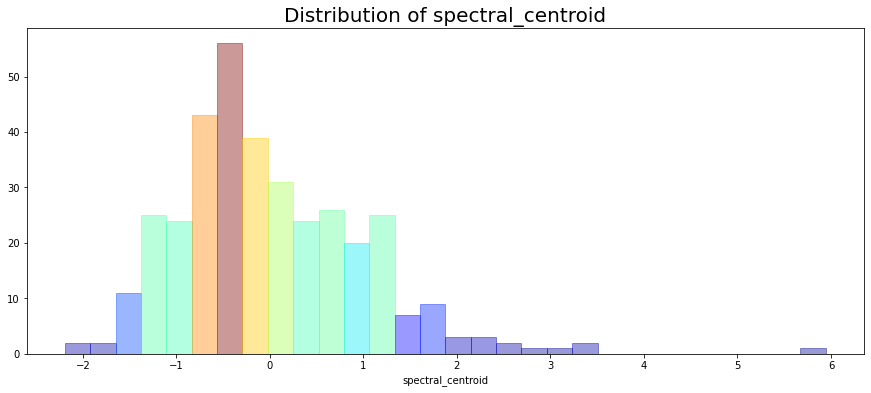

In [48]:
distribution(df_features.spectral_centroid,'Distribution of spectral_centroid')

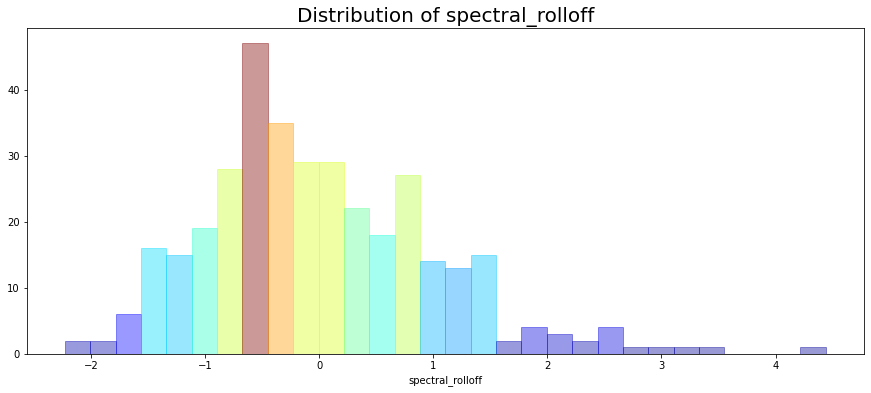

In [49]:
distribution(df_features.spectral_rolloff,'Distribution of spectral_rolloff')

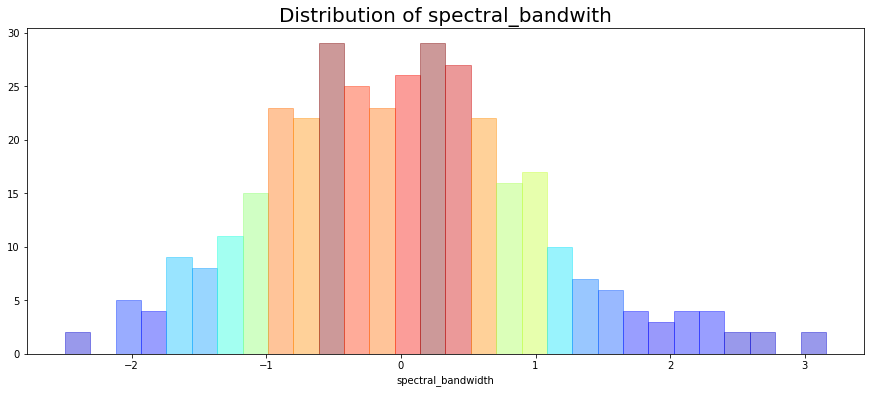

In [50]:
distribution(df_features.spectral_bandwidth,'Distribution of spectral_bandwith')

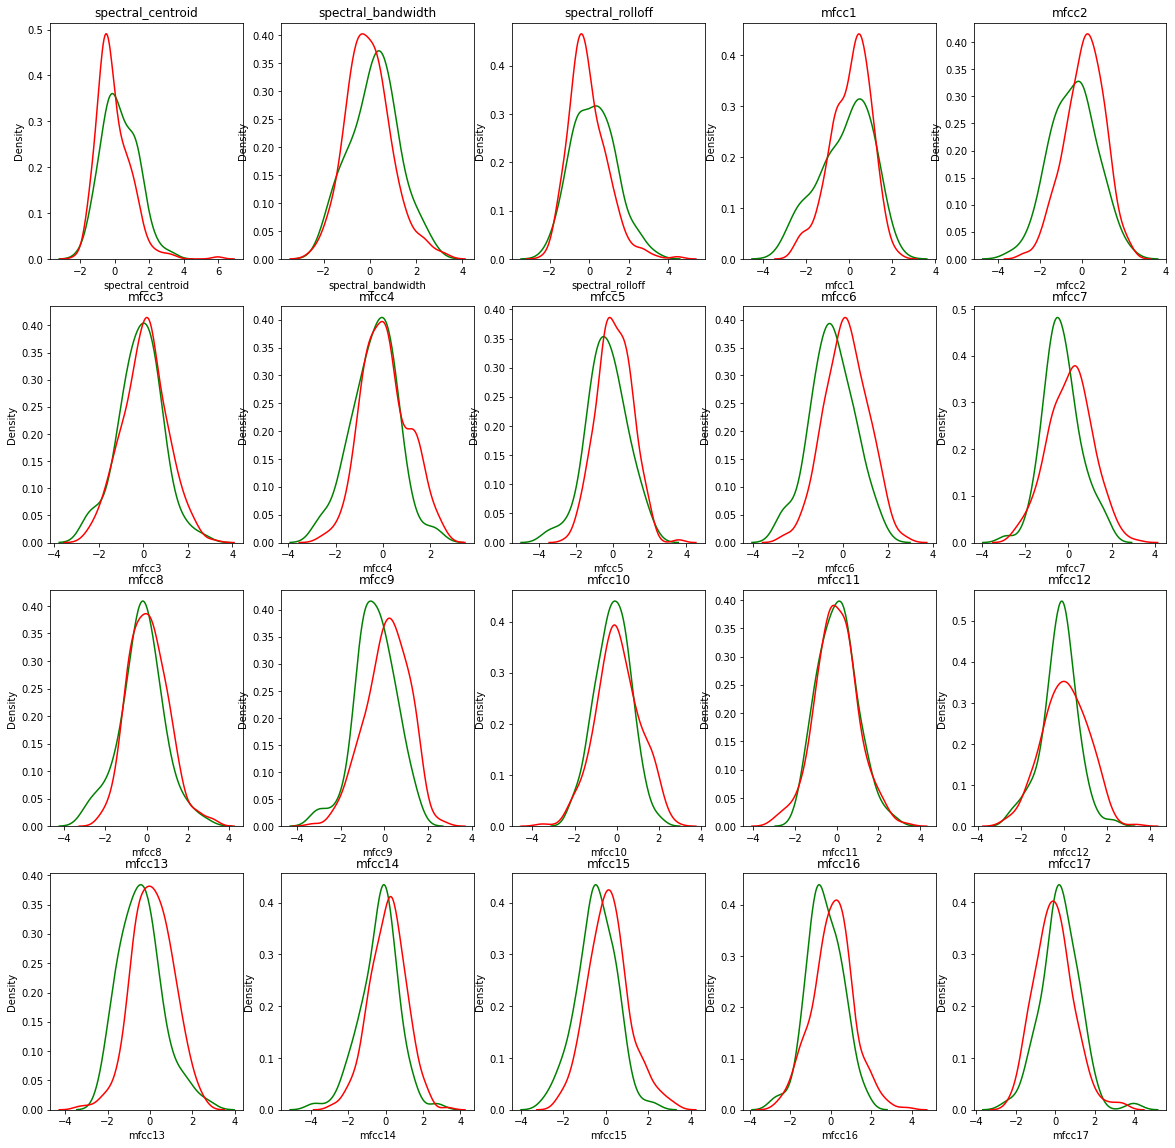

In [51]:
plt.subplots(4,5,figsize=(20,20))
for k in range(1,21):
    plt.subplot(4,5,k)
    plt.title(df_features.columns[k])
    sns.kdeplot(df_features.loc[df_features['label'] == 0, df_features.columns[k]], color= 'green', label='F')
    sns.kdeplot(df_features.loc[df_features['label'] == 1, df_features.columns[k]], color= 'red', label='M')

In [52]:
X = df_features.iloc[:,1:]
y = df_features.label
rskf = RepeatedStratifiedKFold(n_splits=5,
                                   n_repeats=3,
                                   random_state=42)

lst_accu_stratified = []
for train_index, test_index in rskf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

classifiers_and_params = [
    (SVC(), {'C': [200, 150, 100], 'gamma': ['auto', 'scale']}),
    (RandomForestClassifier(), {'n_estimators': [100, 150, 200]})
]

for tup in classifiers_and_params:
    print("{}".format(tup[0].__class__.__name__))
    
    # the main CV process
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
    fold_counter = 0

    results = list()
    for train_idx, test_idx in outer_cv.split(X_new):
        fold_counter += 1
        
        # split data in training and test sets
        X_train, X_test = X_new[train_idx], X_new[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # the CV process used for the Grid Search
        inner_cv = KFold(n_splits=2, shuffle=True, random_state=0)

        # define and run the Grid Search CV process
        gs = GridSearchCV(tup[0], tup[1], scoring='f1_macro', cv=inner_cv, refit=True)
        res = gs.fit(X_train, y_train)

        # get the best model, re-fit on the whole training set
        best_model = res.best_estimator_

        # evaluation on the test set
        pred = best_model.predict(X_test)
        score = f1_score(y_test, pred, average='macro')
        results.append(score)
        
        print("\tFold {}, Best Params {} with F1 Score {:.3f}, F1 Score on Test data {:.3f}"
              .format(fold_counter, res.best_params_, res.best_score_, score))

    print('\tAverage F1 Score on Test Set: {:.3f}\n'.format(np.mean(results)))

SVC
	Fold 1, Best Params {'C': 200, 'gamma': 'auto'} with F1 Score 0.673, F1 Score on Test data 0.535
	Fold 2, Best Params {'C': 200, 'gamma': 'scale'} with F1 Score 0.649, F1 Score on Test data 0.784
	Fold 3, Best Params {'C': 200, 'gamma': 'auto'} with F1 Score 0.553, F1 Score on Test data 0.818
	Average F1 Score on Test Set: 0.712

RandomForestClassifier
	Fold 1, Best Params {'n_estimators': 200} with F1 Score 0.630, F1 Score on Test data 0.526
	Fold 2, Best Params {'n_estimators': 100} with F1 Score 0.631, F1 Score on Test data 0.709
	Fold 3, Best Params {'n_estimators': 150} with F1 Score 0.545, F1 Score on Test data 0.677
	Average F1 Score on Test Set: 0.637

